## Architecture Flow

1. Feature Extraction using VGG16 --> Extract Embeddings from each image
2. Perform Aggregations --> Multiple images from different angles of a different shoe is aggregated to 'summarize' features. In this particular notebook, mean and max is performed. 
3. Compute Cosine Similarity with user input.

### Current Advantage of this Approach
1. Able to recognize inputs from various angles.
2. Able to recommend very similar shoes (if exist in database) based on style, color, and shape. If the price of these shoes are different, it may allow the user to choose relevant shoes with a lower budget.

### Room for Improvements

1. Experiment on Feature Extractor (ResNet, CLIP, etc.)
2. Currently, simple statistical aggregations are performed.

- Pros: No extra training, simple, lightweight, fast. 
- Cons: Might lose importante features during aggregation. 

    For future iterations, employing attention-based models for a more representative embedding per sneaker

3. Adding additional criterias (user preferences, price, other similarities) for more refined relevance

In [2]:
import os 

# len(os.listdir('pics/')[0]

database = 'pics/'
for shoe in range(0, len(os.listdir(database))):
    print(os.listdir(database)[shoe])
    current_shoe_path = database + os.listdir(database)[0] 
    print(os.listdir(current_shoe_path))

Air Jordan 1 Low Black White Grey
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
Nike Dunk Low UNC 2021
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
Nike Air Force 1 Low College Pack Midnight Navy
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
adidas Gazelle Indoor Blue Fusion Gum W
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
adidas Yeezy Slide Resin 2022
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
New Balance 9060 Rain Cloud Grey
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
New Balance 550 White Grey Dark Grey
['img5.jpg', 'img15.jpg', 'img25.jpg', 'img1.jpg', 'img35.jpg', 'img30.jpg', 'img10.jpg', 'img20.jpg']
Air Jordan 1 Low Vintage UNC Grey


Feature Extraction

___

In [3]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image 
from sklearn.metrics.pairwise import cosine_similarity

base_model = VGG16(weights='imagenet', include_top=False)
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dim
    img_array = preprocess_input(img_array)  # Normalize for VGG16
    features = model.predict(img_array)  # Extract features
    
    return features.flatten()  # Flatten feature map


sneaker_features = {}

for sneaker_name in os.listdir(database):
    sneaker_path = os.path.join(database, sneaker_name)
    if os.path.isdir(sneaker_path):
        all_features = []
        
        # Extract features for each image of the sneaker
        for img_name in os.listdir(sneaker_path):
            img_path = os.path.join(sneaker_path, img_name)
            features = extract_features(img_path)
            all_features.append(features)

        # Convert to NumPy array
        all_features = np.array(all_features)

        # Average Pooling
        avg_embedding = np.mean(all_features, axis=0)

        # Max Pooling
        max_embedding = np.max(all_features, axis=0)

        # Store embeddings
        sneaker_features[sneaker_name] = {"avg": avg_embedding, "max": max_embedding}

# Function to find similar sneakers using cosine similarity
def find_similar_sneakers(query_img_path, method="avg", top_k=3):
    query_features = extract_features(query_img_path)
    similarities = []

    for sneaker_name, embeddings in sneaker_features.items():
        sneaker_embedding = embeddings[method]
        similarity = cosine_similarity([query_features], [sneaker_embedding])[0][0]
        similarities.append((sneaker_name, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_k]

2025-03-12 13:01:02.931652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 13:01:03.023346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 13:01:03.122906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741759263.215828  297363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741759263.246032  297363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 13:01:03.521526: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [4]:
# Example usage
query_img = "pics/adidas Campus 80s South Park Towelie/img1.jpg" 
print("Top-3 Sneakers (Avg Pooling):", find_similar_sneakers(query_img, method="avg"))
print("Top-3 Sneakers (Max Pooling):", find_similar_sneakers(query_img, method="max"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Top-3 Sneakers (Avg Pooling): [('adidas Campus 80s South Park Towelie', np.float32(0.75972116)), ('adidas Gazelle Indoor Collegiate Green', np.float32(0.64094204)), ('adidas Samba Team Mexico', np.float32(0.60987973))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Top-3 Sneakers (Max Pooling): [('adidas Campus 80s South Park Towelie', np.float32(0.6651056)), ('adidas Gazelle Indoor Collegiate Green', np.float32(0.56832564)), ('adidas Samba OG Kith Classics Program White', np.float32(0.5541994))]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


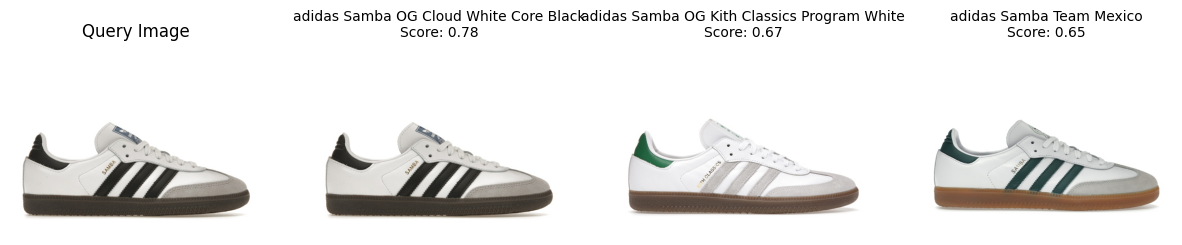

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


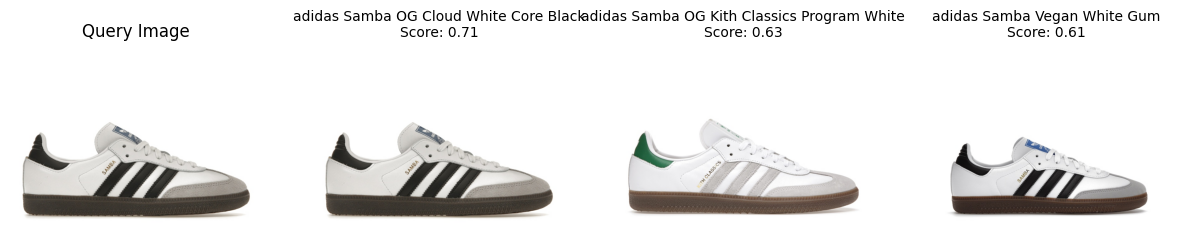

In [16]:
import matplotlib.pyplot as plt
import cv2

# Function to display query and top-3 retrieved sneakers
def display_results(query_img_path, method="avg", top_k=3):
    results = find_similar_sneakers(query_img_path, method=method, top_k=top_k)

    # Load and show the query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 5))  # Create subplots
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image", fontsize=12)
    axes[0].axis("off")

    # Load and show the top-k retrieved sneakers
    for i, (sneaker_name, similarity) in enumerate(results):
        sneaker_img_path = os.path.join(database, sneaker_name, "img1.jpg")  # Show 1st image
        retrieved_img = cv2.imread(sneaker_img_path)
        retrieved_img = cv2.cvtColor(retrieved_img, cv2.COLOR_BGR2RGB)

        axes[i + 1].imshow(retrieved_img)
        axes[i + 1].set_title(f"{sneaker_name}\nScore: {similarity:.2f}", fontsize=10)
        axes[i + 1].axis("off")

    plt.show()

# Example usage
query_img = "pics/adidas Samba OG Cloud White Core Black/img1.jpg"
display_results(query_img, method="avg")
display_results(query_img, method="max")

The directory feetflix/ contains pictures with different resolutions. Although 'adidas Campus 80s South Park Towelie' exists in the database, the algorithm fails to catch it, most likely due to difference in resolutions. Augmentation should be able to help with this issue. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


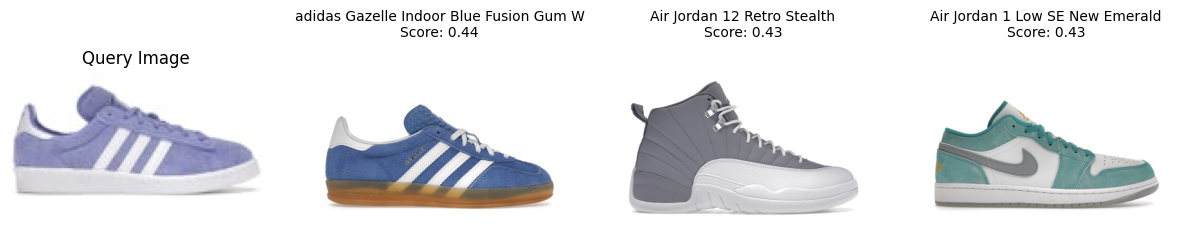

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


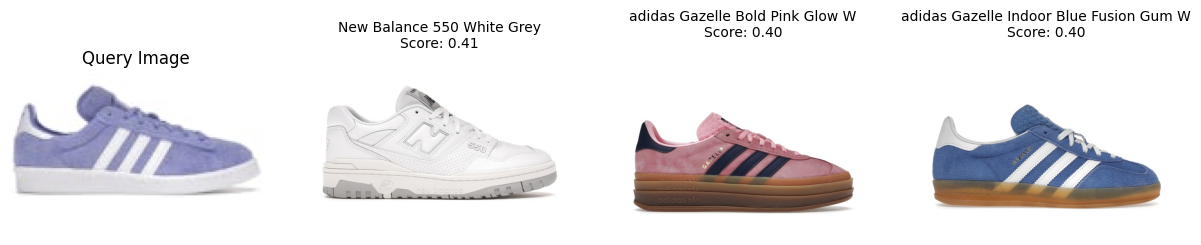

In [11]:
query_img = "feetflix/adidas Campus 80s South Park Towelie.jpg"
display_results(query_img, method="avg")
display_results(query_img, method="max")